# Prediction of Triton work for "NL I-9" and each second TestMuh

### target is CHE_FIGN;  is discrete or categorical variable and thus binary classification

### what factor affecting target to change



In [1]:
# CHE_FIGN
# 0.0    208097
# 1.0        14
# 9.0         1
# Name: CHE_FIGN_1, dtype: int64

In [2]:
# BLOWRPWM
# CHE_FCDV
# CHE_BPDV
# FLAMETST
# FLAME_ON
# C_HEALTH
# ALARM_01
# ALARM_02
# ALARM_03
# ALARM_04
# FLAMECUR
# FANSPEED
# VLVSTATE
# GASVALVE
# S3_EXPRS
# S2_INPRS
# S1_AIRFL
# TANKTEMP
# CHE_FIGN
# CHE_BMIN
# INLTTEMP

In [3]:
# Required Imports
import glob
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#creating dataframe df1 of "NL I09"
df1 = pd.concat(map(pd.read_csv, glob.glob('data1/*.csv')))

C:\Users\muhammad.tahir.ctr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (2,3,4,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
#readong first 5 rows of "NL I09"
df1.head()

,Time,Date,BLOWRPWM_1,CHE_FCDV_1,CHE_BPDV_1,FLAMETST_1,FLAME_ON_1,C_HEALTH_1,ALARM_01_1,ALARM_02_1,ALARM_03_1,Unnamed: 11
0,12:57:56 PM,9/10/2021,0.0,0,-1,6.4,No,93.4,,,,NaN
1,12:57:57 PM,9/10/2021,0.0,0,-1,6.4,No,93.4,,,,NaN
2,12:57:58 PM,9/10/2021,0.0,0,-1,6.4,No,93.4,,,,NaN
3,12:57:59 PM,9/10/2021,---,---,---,---,---,---,---,---,---,NaN
4,12:58:00 PM,9/10/2021,0.0,0,-1,6.4,No,93.4,,,,NaN


In [6]:
# looking at null values and data types of each column for "NL I09"
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383286 entries, 0 to 31937
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         383286 non-null  object 
 1   Date         383286 non-null  object 
 2   BLOWRPWM_1   383286 non-null  object 
 3   CHE_FCDV_1   383286 non-null  object 
 4   CHE_BPDV_1   383286 non-null  object 
 5   FLAMETST_1   383286 non-null  object 
 6   FLAME_ON_1   383286 non-null  object 
 7   C_HEALTH_1   383286 non-null  object 
 8   ALARM_01_1   383285 non-null  object 
 9   ALARM_02_1   383286 non-null  object 
 10  ALARM_03_1   383286 non-null  object 
 11  Unnamed: 11  0 non-null       float64
dtypes: float64(1), object(11)
memory usage: 38.0+ MB


In [7]:
df1.columns

Index(['Time', 'Date', 'BLOWRPWM_1', 'CHE_FCDV_1', 'CHE_BPDV_1', 'FLAMETST_1',
       'FLAME_ON_1', 'C_HEALTH_1', 'ALARM_01_1', 'ALARM_02_1', 'ALARM_03_1',
       'Unnamed: 11'],
      dtype='object')

In [8]:
df1['date_time'] = df1['Date'] + ' ' + df1['Time']
df1 = df1.set_index('date_time')
df1 = df1.drop(['Date','Time'], axis=1)
df1.index = pd.to_datetime(df1.index, format='%m/%d/%Y %I:%M:%S %p')
df1 = df1[df1.index.notnull()]
df1 = df1.sort_index()

In [9]:
delta_time = df1.index.to_series().diff()

In [10]:
delta_time.value_counts().nlargest(10)

0 days 00:00:01    383283
0 days 09:25:16         1
0 days 00:01:02         1
Name: date_time, dtype: int64

In [11]:
delta_time.nlargest(30)

date_time
2021-09-13 09:25:15   0 days 09:25:16
2021-09-13 17:06:23   0 days 00:01:02
2021-09-10 12:57:57   0 days 00:00:01
2021-09-10 12:57:58   0 days 00:00:01
2021-09-10 12:57:59   0 days 00:00:01
2021-09-10 12:58:00   0 days 00:00:01
2021-09-10 12:58:01   0 days 00:00:01
2021-09-10 12:58:02   0 days 00:00:01
2021-09-10 12:58:03   0 days 00:00:01
2021-09-10 12:58:04   0 days 00:00:01
2021-09-10 12:58:05   0 days 00:00:01
2021-09-10 12:58:06   0 days 00:00:01
2021-09-10 12:58:07   0 days 00:00:01
2021-09-10 12:58:08   0 days 00:00:01
2021-09-10 12:58:09   0 days 00:00:01
2021-09-10 12:58:10   0 days 00:00:01
2021-09-10 12:58:11   0 days 00:00:01
2021-09-10 12:58:12   0 days 00:00:01
2021-09-10 12:58:13   0 days 00:00:01
2021-09-10 12:58:14   0 days 00:00:01
2021-09-10 12:58:15   0 days 00:00:01
2021-09-10 12:58:16   0 days 00:00:01
2021-09-10 12:58:17   0 days 00:00:01
2021-09-10 12:58:18   0 days 00:00:01
2021-09-10 12:58:19   0 days 00:00:01
2021-09-10 12:58:20   0 days 00:00:01
20

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383286 entries, 2021-09-10 12:57:56 to 2021-09-15 08:52:17
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   BLOWRPWM_1   383286 non-null  object 
 1   CHE_FCDV_1   383286 non-null  object 
 2   CHE_BPDV_1   383286 non-null  object 
 3   FLAMETST_1   383286 non-null  object 
 4   FLAME_ON_1   383286 non-null  object 
 5   C_HEALTH_1   383286 non-null  object 
 6   ALARM_01_1   383285 non-null  object 
 7   ALARM_02_1   383286 non-null  object 
 8   ALARM_03_1   383286 non-null  object 
 9   Unnamed: 11  0 non-null       float64
dtypes: float64(1), object(9)
memory usage: 32.2+ MB


In [13]:
df1.head()

,BLOWRPWM_1,CHE_FCDV_1,CHE_BPDV_1,FLAMETST_1,FLAME_ON_1,C_HEALTH_1,ALARM_01_1,ALARM_02_1,ALARM_03_1,Unnamed: 11
date_time,,,,,,,,,,
2021-09-10 12:57:56,0.0,0,-1,6.4,No,93.4,,,,NaN
2021-09-10 12:57:57,0.0,0,-1,6.4,No,93.4,,,,NaN
2021-09-10 12:57:58,0.0,0,-1,6.4,No,93.4,,,,NaN
2021-09-10 12:57:59,---,---,---,---,---,---,---,---,---,NaN
2021-09-10 12:58:00,0.0,0,-1,6.4,No,93.4,,,,NaN


In [14]:
df1 = df1.drop(['Unnamed: 11'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383286 entries, 2021-09-10 12:57:56 to 2021-09-15 08:52:17
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   BLOWRPWM_1  383286 non-null  object
 1   CHE_FCDV_1  383286 non-null  object
 2   CHE_BPDV_1  383286 non-null  object
 3   FLAMETST_1  383286 non-null  object
 4   FLAME_ON_1  383286 non-null  object
 5   C_HEALTH_1  383286 non-null  object
 6   ALARM_01_1  383285 non-null  object
 7   ALARM_02_1  383286 non-null  object
 8   ALARM_03_1  383286 non-null  object
dtypes: object(9)
memory usage: 29.2+ MB


In [15]:
#creating dataframe df1 of "NL I09"
df2 =  pd.concat(map(pd.read_csv, glob.glob('data2/*.csv')))

In [16]:
df2.head()

,Time,Date,ALARM_04_1,FLAMECUR_1,FANSPEED_1,VLVSTATE_1,GASVALVE_1,S3_EXPRS_1,S2_INPRS_1,S1_AIRFL_1,TANKTEMP_1,CHE_FIGN_1,CHE_BMIN_1,INLTTEMP_1,Unnamed: 14
0,12:55:55 PM,9/10/2021,,0.0,0,Standby,Closed,Closed,Closed,Open,177.9,3230,64151,78.1,NaN
1,12:55:56 PM,9/10/2021,,0.0,0,Standby,Closed,Closed,Closed,Open,177.9,3230,64151,78.1,NaN
2,12:55:57 PM,9/10/2021,,0.0,0,Standby,Closed,Closed,Closed,Open,177.9,3230,64151,78.1,NaN
3,12:55:58 PM,9/10/2021,,0.0,0,Standby,Closed,Closed,Closed,Open,177.9,3230,64151,78.2,NaN
4,12:55:59 PM,9/10/2021,,0.0,0,Standby,Closed,Closed,Closed,Open,177.9,3230,64151,78.2,NaN


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383636 entries, 0 to 31937
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         383636 non-null  object 
 1   Date         383636 non-null  object 
 2   ALARM_04_1   383636 non-null  object 
 3   FLAMECUR_1   383636 non-null  object 
 4   FANSPEED_1   383636 non-null  object 
 5   VLVSTATE_1   383636 non-null  object 
 6   GASVALVE_1   383636 non-null  object 
 7   S3_EXPRS_1   383636 non-null  object 
 8   S2_INPRS_1   383636 non-null  object 
 9   S1_AIRFL_1   383636 non-null  object 
 10  TANKTEMP_1   383636 non-null  object 
 11  CHE_FIGN_1   383636 non-null  object 
 12  CHE_BMIN_1   383636 non-null  object 
 13  INLTTEMP_1   383636 non-null  object 
 14  Unnamed: 14  0 non-null       float64
dtypes: float64(1), object(14)
memory usage: 46.8+ MB


In [18]:
#df2['date_time'] = df2['Time'] + ' ' + df2['Date']

In [19]:
df2['date_time'] = df2['Date'] + ' ' + df2['Time']
df2 = df2.set_index('date_time')
df2 = df2.drop(['Time'], axis=1)
df2.index = pd.to_datetime(df2.index, format='%m/%d/%Y %I:%M:%S %p')
df2 = df2[df2.index.notnull()]
df2 = df2.sort_index()

In [20]:
delta_time = df2.index.to_series().diff()

In [21]:
#delta_time = df.index.to_series().diff()

In [22]:
delta_time.value_counts().nlargest(10)

0 days 00:00:01    383634
0 days 09:22:28         1
Name: date_time, dtype: int64

In [23]:
delta_time.nlargest(30)

date_time
2021-09-13 09:22:27   0 days 09:22:28
2021-09-10 12:55:56   0 days 00:00:01
2021-09-10 12:55:57   0 days 00:00:01
2021-09-10 12:55:58   0 days 00:00:01
2021-09-10 12:55:59   0 days 00:00:01
2021-09-10 12:56:00   0 days 00:00:01
2021-09-10 12:56:01   0 days 00:00:01
2021-09-10 12:56:02   0 days 00:00:01
2021-09-10 12:56:03   0 days 00:00:01
2021-09-10 12:56:04   0 days 00:00:01
2021-09-10 12:56:05   0 days 00:00:01
2021-09-10 12:56:06   0 days 00:00:01
2021-09-10 12:56:07   0 days 00:00:01
2021-09-10 12:56:08   0 days 00:00:01
2021-09-10 12:56:09   0 days 00:00:01
2021-09-10 12:56:10   0 days 00:00:01
2021-09-10 12:56:11   0 days 00:00:01
2021-09-10 12:56:12   0 days 00:00:01
2021-09-10 12:56:13   0 days 00:00:01
2021-09-10 12:56:14   0 days 00:00:01
2021-09-10 12:56:15   0 days 00:00:01
2021-09-10 12:56:16   0 days 00:00:01
2021-09-10 12:56:17   0 days 00:00:01
2021-09-10 12:56:18   0 days 00:00:01
2021-09-10 12:56:19   0 days 00:00:01
2021-09-10 12:56:20   0 days 00:00:01
20

In [24]:
df2 = df2.drop(['Unnamed: 14'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383636 entries, 2021-09-10 12:55:55 to 2021-09-15 08:52:17
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Date        383636 non-null  object
 1   ALARM_04_1  383636 non-null  object
 2   FLAMECUR_1  383636 non-null  object
 3   FANSPEED_1  383636 non-null  object
 4   VLVSTATE_1  383636 non-null  object
 5   GASVALVE_1  383636 non-null  object
 6   S3_EXPRS_1  383636 non-null  object
 7   S2_INPRS_1  383636 non-null  object
 8   S1_AIRFL_1  383636 non-null  object
 9   TANKTEMP_1  383636 non-null  object
 10  CHE_FIGN_1  383636 non-null  object
 11  CHE_BMIN_1  383636 non-null  object
 12  INLTTEMP_1  383636 non-null  object
dtypes: object(13)
memory usage: 41.0+ MB


In [25]:
#df2.loc[df2['CHE_FIGN_1']=='9']


In [26]:
#df2['CHE_FIGN_2'] = df2['CHE_FIGN_1'].astype(int).diff()

In [27]:
# first combine time and date and then merge on date/time

In [28]:
df3 = df1.merge(df2, on='date_time', how='inner')
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383286 entries, 2021-09-10 12:57:56 to 2021-09-15 08:52:17
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   BLOWRPWM_1  383286 non-null  object
 1   CHE_FCDV_1  383286 non-null  object
 2   CHE_BPDV_1  383286 non-null  object
 3   FLAMETST_1  383286 non-null  object
 4   FLAME_ON_1  383286 non-null  object
 5   C_HEALTH_1  383286 non-null  object
 6   ALARM_01_1  383285 non-null  object
 7   ALARM_02_1  383286 non-null  object
 8   ALARM_03_1  383286 non-null  object
 9   Date        383286 non-null  object
 10  ALARM_04_1  383286 non-null  object
 11  FLAMECUR_1  383286 non-null  object
 12  FANSPEED_1  383286 non-null  object
 13  VLVSTATE_1  383286 non-null  object
 14  GASVALVE_1  383286 non-null  object
 15  S3_EXPRS_1  383286 non-null  object
 16  S2_INPRS_1  383286 non-null  object
 17  S1_AIRFL_1  383286 non-null  object
 18  TANKTEMP_1  383286 non-null  o

In [29]:
#df_final = df3.drop(['Unnamed: 11', 'Unnamed: 14', 'Date_x', 'Date_y'], axis=1)
#df_final.info()

In [30]:
df_final = df3

In [31]:
df_final['BLOWRPWM_1'].value_counts()

---     175166
0.0      88073
68.0     40346
0.0      29743
68.0     13631
         ...  
21.0        15
61.5        11
24.5        11
20.0        10
25.5        10
Name: BLOWRPWM_1, Length: 195, dtype: int64

In [32]:
df_final['BLOWRPWM_1'].unique()

array(['0.0', '---', '26.0', '34.0', '23.0', '26.5', '27.5', '28.0',
       '40.0', '51.0', '62.0', '67.0', '68.0', '68.5', '67.5', '65.0',
       '59.5', '56.5', '53.5', '49.5', '45.5', '42.5', '39.0', '37.0',
       '35.0', '32.0', '29.0', '24.0', '31.0', '25.0', '30.0', '48.0',
       '60.0', '66.5', '61.5', '58.5', '55.0', '52.0', '46.0', '40.5',
       '36.5', '28.5', '27.0', '22.5', '39.5', '50.5', '62.5', '63.0',
       '57.0', '46.5', '43.5', '41.0', '38.5', '35.5', '33.0', '21.0',
       '42.0', '53.0', '64.0', '63.5', '56.0', '52.5', '47.0', '44.0',
       '34.5', '32.5', '61.0', '57.5', '54.5', '51.5', '64.5', '48.5',
       '45.0', '43.0', '36.0', '29.5', '47.5', '66.0', '60.5', '38.0',
       '59.0', '55.5', '22.0', '23.5', '58.0', '54.0', '65.5', '50.0',
       '37.5', '25.5', '44.5', '31.5', '24.5', '41.5', '30.5', '20.0',
       '33.5', '49.0', 0.0, 20.0, 28.0, 29.0, 24.0, 27.5, 33.0, 45.0,
       56.0, 64.0, 67.5, 68.0, 68.5, 66.5, 62.5, 60.5, 57.0, 53.5, 49.5,
       

In [33]:
df_final.drop(df_final[df_final['BLOWRPWM_1']=='---'].index, inplace = True)

In [34]:
#what about dash and other values ?
# remove dashes
# combine any string and numbers
# these are percentages
# higher number means faster speed of the fan

In [35]:
df_final['BLOWRPWM_1'] = df_final['BLOWRPWM_1'].astype(float)

In [36]:
df_final['BLOWRPWM_1'].dtype

dtype('float64')

In [37]:
df_final['CHE_FCDV_1'].value_counts()

0     154861
0      52802
54       457
Name: CHE_FCDV_1, dtype: int64

In [38]:
df_final['CHE_FCDV_1'].unique()

array(['0', '54', 0], dtype=object)

In [39]:
df_final['CHE_FCDV_1'].dtype

dtype('O')

In [40]:
# to change labels of "CHE_FCDV_1"

CHE_FCDV_1_dict = {
    '0': 0,
    0: 0,
    '54': 54
}

df_final["CHE_FCDV_1"] = df_final["CHE_FCDV_1"].map(CHE_FCDV_1_dict)

In [41]:
#what about dash and other values ?
# remove dashes
# keep zero and 54 , keep betweem 0 and 100

In [42]:
df_final['CHE_BPDV_1'].value_counts()

-1    123822
-1     43056
0      31496
0       9746
Name: CHE_BPDV_1, dtype: int64

In [43]:
df_final['CHE_BPDV_1'].unique()

array(['-1', '0', -1, 0], dtype=object)

In [44]:
# to change labels of "CHE_BPDV_1"

CHE_BPDV_1_dict = {
    '-1': -1,
    -1: -1,
    0: 0,
    '0': 0
}

df_final["CHE_BPDV_1"] = df_final["CHE_BPDV_1"].map(CHE_BPDV_1_dict)

In [45]:
#what about dash and other values ?
# remove dashes
# 0 and -1 percentages values
# blower deviation

In [46]:
df_final['CHE_BPDV_1'].unique()

array([-1,  0], dtype=int64)

In [47]:
df_final['CHE_BPDV_1'].dtype

dtype('int64')

In [48]:
df_final['FLAMETST_1'].value_counts()

6.4    54849
6.2    24698
6.3    22049
6.5    20116
6.4    18444
6.6    13810
6.5    10692
6.3     9370
6.9     7496
6.6     6025
6.8     3307
6.8     2775
6.2     2446
7.0     2140
6.7     2068
7.1     1109
7.0     1095
6.7     1068
7.2     1043
0.9      866
1.8      450
3.1      447
1.1      447
3.3      444
1.0      440
3.8      425
0.0        1
Name: FLAMETST_1, dtype: int64

In [49]:
df_final['FLAMETST_1'].unique()

array(['6.4', '6.5', '6.7', '6.9', '6.6', '3.8', '0.9', '6.2', '0.0',
       '7.1', '6.3', '6.8', '3.3', '7.0', '1.1', '1.8', '7.2', 6.8, 6.2,
       6.4, 6.3, 6.6, 6.5, 6.7, 7.0, 1.0, 3.1], dtype=object)

In [50]:
df_final['FLAMETST_1'] = df_final['FLAMETST_1'].astype(float)

In [51]:
df_final['FLAMETST_1'].dtype

dtype('float64')

In [52]:
#what about dash and other values ?
# remove dashes
# others are good between 0 and 10

In [53]:
#FLAME_ON_1
df_final['FLAME_ON_1'].unique()

array(['No', 'Yes', 'Closed'], dtype=object)

In [54]:
df_final['FLAME_ON_1'].value_counts()

No        125434
Yes        82685
Closed         1
Name: FLAME_ON_1, dtype: int64

In [55]:
# to change labels of "FLAME_ON_1"

FLAME_ON_1_dict = {
    'No': 0,
    'Yes': 1
}

df_final["FLAME_ON_1"] = df_final["FLAME_ON_1"].map(FLAME_ON_1_dict)

In [56]:
df_final['FLAME_ON_1'].value_counts()

0.0    125434
1.0     82685
Name: FLAME_ON_1, dtype: int64

In [57]:
#df.dropna(subset=['assists'])

In [58]:
#df_final.dropna(subset = ['FLAME_ON_1'])

In [59]:
df_final['FLAME_ON_1'].unique()

array([ 0.,  1., nan])

In [60]:
df_final = df_final.loc[df_final['FLAME_ON_1'].notnull()]

In [61]:
df_final['FLAME_ON_1'].isnull().sum()

0

In [62]:
#what about dash and other values ?
# remove dashes
# yes is 1 and no is zero
# drop close values

In [63]:
#C_HEALTH_1
df_final['C_HEALTH_1'].unique()

array(['93.4', '94.1', '95.4', '94.6', '94.0', '94.3', '94.9', '95.6',
       '93.5', '96.1', '92.8', '92.0', '95.5', '93.6', '93.1', '92.9',
       '96.0', '97.6', '96.8', '95.3', '96.4', '94.4', '94.8', '93.0',
       '95.0', '93.8', '96.3', '95.9', '96.6', '96.9', '97.4', '96.5',
       '98.0', '81.1', 95.4, 94.6, 94.1, 94.4, 95.6, 96.1, 96.3, 96.0,
       94.8, 95.3, 94.0, 95.5, 95.0, 94.3], dtype=object)

In [64]:
df_final['C_HEALTH_1'] = df_final['C_HEALTH_1'].astype(float)

<ipython-input-64-a08aa713bf85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['C_HEALTH_1'] = df_final['C_HEALTH_1'].astype(float)


In [65]:
df_final['C_HEALTH_1'].value_counts()

94.6    27447
95.4    25543
95.9    15082
96.0    14983
95.3    13646
93.5    10393
96.1     9766
94.1     9545
94.8     8632
95.5     8420
96.6     7639
94.0     6504
96.3     6501
96.9     6443
93.4     5747
95.6     5432
94.9     4208
95.0     3244
94.3     3231
94.4     2140
96.8     2119
92.0     2093
92.8     2082
97.4     1089
98.0     1085
93.0     1058
93.6     1043
96.5     1042
96.4     1032
81.1      457
97.6      403
93.8       39
93.1       22
92.9        9
Name: C_HEALTH_1, dtype: int64

In [66]:
#what about dash and other values ?
# remove dashes
# 0 and 100 fine below 70 triger alarm but above 70 is good and no alarm

In [67]:
df_final['ALARM_01_1'].unique()

array(['                                                ',
       'T114 Flame Rod Degraded and Needs Servicing     ',
       'T113 Flame Rod Degraded and Needs Servicing     '], dtype=object)

In [68]:
#what about dash and other values ?
# remove dashes

In [69]:
# to change labels of "ALARM_01"

ALARM_01_dict = {
    'nan': 'nan',
    '                                                ': "no_alarm",
    'T113 Flame Rod Degraded and Needs Servicing     ': 'T113 Flame Rod Degraded and Needs Servicing',
    'T114 Flame Rod Degraded and Needs Servicing     ': 'T114 Flame Rod Degraded and Needs Servicing',
}

df_final["ALARM_01_1"] = df_final["ALARM_01_1"].map(ALARM_01_dict)

<ipython-input-69-020e119ff1ea>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["ALARM_01_1"] = df_final["ALARM_01_1"].map(ALARM_01_dict)


In [70]:
df_final['ALARM_01_1'].value_counts()

no_alarm                                       205918
T113 Flame Rod Degraded and Needs Servicing      1335
T114 Flame Rod Degraded and Needs Servicing       866
Name: ALARM_01_1, dtype: int64

In [71]:
df_final['ALARM_02_1'].unique()

array(['                                                '], dtype=object)

In [72]:
# to change labels of "ALARM_02"

ALARM_02_dict = {
    '                                                ': "no_alarm"
}

df_final["ALARM_02_1"] = df_final["ALARM_02_1"].map(ALARM_02_dict)

<ipython-input-72-3de0f3d7168a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["ALARM_02_1"] = df_final["ALARM_02_1"].map(ALARM_02_dict)


In [73]:
df_final['ALARM_02_1'].value_counts()

no_alarm    208119
Name: ALARM_02_1, dtype: int64

In [74]:
# remove dashes
# remove 4 values
# empty means "no alarm"

In [75]:
# flame on closed and test alarm 2 and 3 if values are in same row
# if happen in same row then 

# what is huge data is coming before 

In [76]:
df_final['ALARM_03_1'].unique()

array(['                                                '], dtype=object)

In [77]:
# to change labels of "ALARM_03"

ALARM_03_dict = {
    '                                                ': "no_alarm"
}

df_final["ALARM_03_1"] = df_final["ALARM_03_1"].map(ALARM_03_dict)

<ipython-input-77-363588ddabc5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["ALARM_03_1"] = df_final["ALARM_03_1"].map(ALARM_03_dict)


In [78]:
df_final['ALARM_03_1'].value_counts()

no_alarm    208119
Name: ALARM_03_1, dtype: int64

In [79]:
df_final['ALARM_04_1'].unique()

array(['                                                ', '---'],
      dtype=object)

In [80]:
# to change labels of "ALARM_04"

ALARM_04_dict = {
    '                                                ': "no_alarm"
}

df_final["ALARM_04_1"] = df_final["ALARM_04_1"].map(ALARM_04_dict)

<ipython-input-80-77608f72e1c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["ALARM_04_1"] = df_final["ALARM_04_1"].map(ALARM_04_dict)


In [81]:
df_final['ALARM_04_1'].value_counts()

no_alarm    208112
Name: ALARM_04_1, dtype: int64

In [82]:
#FLAMECUR_1
df_final['FLAMECUR_1'].unique()

array(['0.0', '4.1', '3.3', '4.8', '5.2', '5.4', '5.5', '5.6', '5.7',
       '5.8', '5.9', '6.0', '6.2', '6.1', '6.4', '6.3', '2.9', '3.2',
       '3.5', '4.4', '5.0', '5.3', '1.5', '4.0', '1.1', '2.5', '3.4',
       '4.3', '6.5', '0.7', '3.6', '3.8', '3.7', '3.9', '3.1', '4.5',
       '6.7', '1.0', '4.7', '0.4', '0.5', '0.9', '5.1', '0.3', '0.8',
       '6.9', '6.6', '2.3', '2.7', '2.8', '0.6', '2.4', '4.6', '1.7',
       '1.4', '4.9', '1.8', '3.0', '4.2', '2.2', '2.1', '---', '1.2',
       '1.9', '2.6', '1.3', '7.1', '1.6', '6.8', '7.0', '7.2', 5.7, 5.9,
       5.6, 5.8, 6.0, 6.1, 6.2, 6.4, 6.3, 0.9, 0.0, 1.4, 3.8, 2.6, 2.4,
       3.7, 4.7, 5.2, 5.4, 5.5, 6.5, 4.1, 3.0, 3.1, 4.0, 4.8, 0.4, 2.8,
       3.2, 4.6, 5.1, 6.6, 0.6, 0.7, 1.0, 0.8, 2.5, 2.9, 3.4, 4.2, 0.5,
       3.6, 5.3, 1.3, 4.5, 3.5, 4.4, 5.0, 2.7, 3.3, 2.0, 3.9, 4.3, 4.9,
       1.7, 1.6, 1.5, 2.1, 6.8], dtype=object)

In [83]:
# keep any values and keep them for flames current and flame test
df_final.drop(df_final[df_final['FLAMECUR_1']=='---'].index, inplace = True)

C:\Users\muhammad.tahir.ctr\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [84]:
#FLAMECUR_1
df_final['FLAMECUR_1'].dtype

dtype('O')

In [85]:
df_final['FLAMECUR_1'] = df_final['FLAMECUR_1'].astype(float)

<ipython-input-85-699787744c54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['FLAMECUR_1'] = df_final['FLAMECUR_1'].astype(float)


In [86]:
# remove dashes for all
# between zero and 10

In [87]:
df_final['FANSPEED_1'].unique()

array(['0', '1219', '4322', ..., 3650, 3367, 3207], dtype=object)

In [88]:
#df_final.drop(df_final[df_final['FANSPEED_1']=='...'].index, inplace = True)

In [89]:
df_final['FANSPEED_1'].dtype

dtype('O')

In [90]:
df_final['FANSPEED_1'] = df_final['FANSPEED_1'].astype(int)

<ipython-input-90-97d28349d58f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['FANSPEED_1'] = df_final['FANSPEED_1'].astype(int)


In [91]:
#VLVSTATE_1
df_final['VLVSTATE_1'].value_counts()

Standby       117801
Heating        81599
Pre-Purge       4181
Post-Purge      3159
Ignition        1132
Retry            240
Name: VLVSTATE_1, dtype: int64

In [92]:
df_final['VLVSTATE_1'].unique()

array(['Standby', 'Pre-Purge', 'Ignition', 'Heating', 'Post-Purge',
       'Retry'], dtype=object)

In [93]:
# Standby       == 2
# Heating = 5
# Pre-Purge = 3
# Post-Purge = 6
# Ignition = 4
# Retry = 7

In [94]:
# to change labels of "GASVALVE_1"

VLVSTATE_1_dict = {
    'Standby': 2,
    'Pre-Purge': 3,
    'Ignition': 4,
    'Heating': 5,
    'Retry': 7,
    'Post-Purge': 6
}

df_final['VLVSTATE_1'] = df_final['VLVSTATE_1'].map(VLVSTATE_1_dict)

<ipython-input-94-0baf5f625d4b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['VLVSTATE_1'] = df_final['VLVSTATE_1'].map(VLVSTATE_1_dict)


In [95]:
#GASVALVE_1
df_final['GASVALVE_1'].value_counts()

Closed    125387
Open       82725
Name: GASVALVE_1, dtype: int64

In [96]:
# to change labels of "GASVALVE_1"

GASVALVE_dict = {
    'Closed': 0,
    
    'Open': 1
}

df_final["GASVALVE_1"] = df_final["GASVALVE_1"].map(GASVALVE_dict)

<ipython-input-96-9cd34ea650d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["GASVALVE_1"] = df_final["GASVALVE_1"].map(GASVALVE_dict)


In [97]:
# remove dashes
# open close means 0 and 1

In [98]:
#S3_EXPRS_1
df_final['S3_EXPRS_1'].value_counts()

Closed    208110
Open           2
Name: S3_EXPRS_1, dtype: int64

In [99]:
# to change labels of "S2_INPRS"

S3_EXPRS_dict = {
    'Closed': 0,
    
    'Open': 1
}

df_final["S3_EXPRS_1"] = df_final["S3_EXPRS_1"].map(S3_EXPRS_dict)

<ipython-input-99-93fcbf34a9fc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["S3_EXPRS_1"] = df_final["S3_EXPRS_1"].map(S3_EXPRS_dict)


In [100]:
#S2_INPRS_1
df_final['S2_INPRS_1'].value_counts()

Closed    208110
Open           2
Name: S2_INPRS_1, dtype: int64

In [101]:
# to change labels of "S2_INPRS"

S2_INPRS_dict = {
    'Closed': 0,
    
    'Open': 1
}

df_final["S2_INPRS_1"] = df_final["S2_INPRS_1"].map(S2_INPRS_dict)

<ipython-input-101-435be4d9c3e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["S2_INPRS_1"] = df_final["S2_INPRS_1"].map(S2_INPRS_dict)


In [102]:
#S1_AIRFL_1
df_final['S1_AIRFL_1'].value_counts()

Open      118027
Closed     90085
Name: S1_AIRFL_1, dtype: int64

In [103]:
# to change labels of "S1_AIRFL"

S1_AIRFL_dict = {
    'Closed': 0,
    'Open': 1
}

df_final["S1_AIRFL_1"] = df_final["S1_AIRFL_1"].map(S1_AIRFL_dict)

<ipython-input-103-4e1e0786befb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["S1_AIRFL_1"] = df_final["S1_AIRFL_1"].map(S1_AIRFL_dict)


In [104]:
df_final['S1_AIRFL_1'].value_counts()

1    118027
0     90085
Name: S1_AIRFL_1, dtype: int64

In [105]:
#TANKTEMP_1
df_final['TANKTEMP_1'].value_counts()

183.4    2078
183.5    2035
183.3    2013
183.8    1994
183.9    1988
         ... 
165.7      10
167.3      10
143.1       9
184.8       4
184.7       3
Name: TANKTEMP_1, Length: 846, dtype: int64

In [106]:
#df_final.drop(df_final[df_final['TANKTEMP_1']=='---'].index, inplace = True)

In [107]:
df_final['TANKTEMP_1'] = df_final['TANKTEMP_1'].astype(float)

<ipython-input-107-0284e37c62a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['TANKTEMP_1'] = df_final['TANKTEMP_1'].astype(float)


In [108]:
# df_final['TANKTEMP_1'].min()

In [109]:
#CHE_FIGN_1
df_final['CHE_FIGN_1'].value_counts()

3248    44287
3247    40630
3251    27158
3253    18023
3234    15674
3252     9734
3232     9391
3250     6475
3245     6424
3246     6409
3233     5224
3244     4221
3231     4188
3251     4181
3230     3524
3249     2166
3243      403
Name: CHE_FIGN_1, dtype: int64

In [110]:
#df_final.drop(df_final[df_final['CHE_FIGN_1']=='---'].index, inplace = True)

In [111]:
df_final['CHE_FIGN_1'] = df_final['CHE_FIGN_1'].astype(int)

<ipython-input-111-53401e33f921>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['CHE_FIGN_1'] = df_final['CHE_FIGN_1'].astype(int)


In [112]:
df_final['CHE_FIGN_1'].unique()

array([3230, 3231, 3232, 3233, 3234, 3243, 3244, 3245, 3246, 3247, 3248,
       3249, 3250, 3251, 3252, 3253])

In [113]:
df_final['CHE_FIGN_1'].value_counts()

3248    44287
3247    40630
3251    31339
3253    18023
3234    15674
3252     9734
3232     9391
3250     6475
3245     6424
3246     6409
3233     5224
3244     4221
3231     4188
3230     3524
3249     2166
3243      403
Name: CHE_FIGN_1, dtype: int64

In [114]:
df_final['CHE_FIGN_1'].isnull().sum()

0

In [115]:
# what is 9 == 

In [116]:
#CHE_BMIN_1
df_final['CHE_BMIN_1'].value_counts()

65864    761
66476    759
66434    754
65823    753
65878    749
        ... 
64279     55
65932     36
66656     36
65931     25
66656     23
Name: CHE_BMIN_1, Length: 1368, dtype: int64

In [117]:
#df_final.drop(df_final[df_final['CHE_BMIN_1']=='---'].index, inplace = True)

In [118]:
df_final['CHE_BMIN_1'] = df_final['CHE_BMIN_1'].astype(int)

<ipython-input-118-a99d5ce91b3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['CHE_BMIN_1'] = df_final['CHE_BMIN_1'].astype(int)


In [119]:
df_final['CHE_BMIN_1'].isnull().sum()

0

In [120]:
# INLTTEMP_1
df_final['INLTTEMP_1'].value_counts()

79.2    3096
80.2    2986
79.3    2731
79.1    2691
80.3    2679
        ... 
50.4       7
65.2       7
50.6       6
50.6       4
50.5       3
Name: INLTTEMP_1, Length: 652, dtype: int64

In [121]:
#df_final.drop(df_final[df_final['INLTTEMP_1']=='---'].index, inplace = True)

In [122]:
df_final['INLTTEMP_1'] = df_final['INLTTEMP_1'].astype(float)

<ipython-input-122-f10ac9188436>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['INLTTEMP_1'] = df_final['INLTTEMP_1'].astype(float)


In [123]:
df_final['CHE_FIGN_1'] = df_final['CHE_FIGN_1'].diff()

<ipython-input-123-f973ef1a27db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['CHE_FIGN_1'] = df_final['CHE_FIGN_1'].diff()


In [124]:
df_final['CHE_FIGN_1'].unique()

array([nan,  0.,  1.,  9.])

In [125]:
df_final.loc[df_final['CHE_FIGN_1']==9]

,BLOWRPWM_1,CHE_FCDV_1,CHE_BPDV_1,FLAMETST_1,FLAME_ON_1,C_HEALTH_1,ALARM_01_1,ALARM_02_1,ALARM_03_1,Date,...,FANSPEED_1,VLVSTATE_1,GASVALVE_1,S3_EXPRS_1,S2_INPRS_1,S1_AIRFL_1,TANKTEMP_1,CHE_FIGN_1,CHE_BMIN_1,INLTTEMP_1
date_time,,,,,,,,,,,,,,,,,,,,,
2021-09-13 09:25:15,0.0,0,0,6.2,0.0,97.6,no_alarm,no_alarm,no_alarm,9/13/2021,...,0,2,0,0,0,1,181.1,9.0,65753,80.4


In [126]:
df_final['CHE_FIGN_1'].iloc[0]=0

C:\Users\muhammad.tahir.ctr\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\muhammad.tahir.ctr\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [127]:
df_final.head()

,BLOWRPWM_1,CHE_FCDV_1,CHE_BPDV_1,FLAMETST_1,FLAME_ON_1,C_HEALTH_1,ALARM_01_1,ALARM_02_1,ALARM_03_1,Date,...,FANSPEED_1,VLVSTATE_1,GASVALVE_1,S3_EXPRS_1,S2_INPRS_1,S1_AIRFL_1,TANKTEMP_1,CHE_FIGN_1,CHE_BMIN_1,INLTTEMP_1
date_time,,,,,,,,,,,,,,,,,,,,,
2021-09-10 12:57:56,0.0,0,-1,6.4,0.0,93.4,no_alarm,no_alarm,no_alarm,9/10/2021,...,0,2,0,0,0,1,180.6,0.0,64151,78.4
2021-09-10 12:57:57,0.0,0,-1,6.4,0.0,93.4,no_alarm,no_alarm,no_alarm,9/10/2021,...,0,2,0,0,0,1,180.6,0.0,64151,78.4
2021-09-10 12:57:58,0.0,0,-1,6.4,0.0,93.4,no_alarm,no_alarm,no_alarm,9/10/2021,...,0,2,0,0,0,1,180.8,0.0,64151,78.4
2021-09-10 12:58:00,0.0,0,-1,6.4,0.0,93.4,no_alarm,no_alarm,no_alarm,9/10/2021,...,0,2,0,0,0,1,180.8,0.0,64151,78.4
2021-09-10 12:58:01,0.0,0,-1,6.4,0.0,93.4,no_alarm,no_alarm,no_alarm,9/10/2021,...,0,2,0,0,0,1,180.9,0.0,64151,78.4


In [128]:
# what is nine then ???????

In [129]:
df_final['CHE_FIGN_1'].value_counts()

0.0    208097
1.0        14
9.0         1
Name: CHE_FIGN_1, dtype: int64

In [130]:
#df_final['CHE_FIGN_1']

In [131]:
df_final['CHE_FIGN_1'].unique()

array([0., 1., 9.])

In [132]:
df_final = df_final[df_final.CHE_FIGN_1 != 9.0]

In [133]:
df_final['CHE_BMIN_1'] = df_final['CHE_BMIN_1'].diff()

In [134]:
df_final['CHE_BMIN_1'].unique()

array([      nan, 0.000e+00, 1.000e+00, 1.349e+03])

In [135]:
df_final['CHE_BMIN_1'].value_counts()

0.0       206744
1.0         1365
1349.0         1
Name: CHE_BMIN_1, dtype: int64

In [136]:
df_final = df_final[df_final.CHE_BMIN_1 != 1349.0]

In [137]:
df_final = df_final[df_final.CHE_BMIN_1.notnull()]

In [138]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 208109 entries, 2021-09-10 12:57:57 to 2021-09-15 08:52:17
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BLOWRPWM_1  208109 non-null  float64
 1   CHE_FCDV_1  208109 non-null  int64  
 2   CHE_BPDV_1  208109 non-null  int64  
 3   FLAMETST_1  208109 non-null  float64
 4   FLAME_ON_1  208109 non-null  float64
 5   C_HEALTH_1  208109 non-null  float64
 6   ALARM_01_1  208109 non-null  object 
 7   ALARM_02_1  208109 non-null  object 
 8   ALARM_03_1  208109 non-null  object 
 9   Date        208109 non-null  object 
 10  ALARM_04_1  208109 non-null  object 
 11  FLAMECUR_1  208109 non-null  float64
 12  FANSPEED_1  208109 non-null  int32  
 13  VLVSTATE_1  208109 non-null  int64  
 14  GASVALVE_1  208109 non-null  int64  
 15  S3_EXPRS_1  208109 non-null  int64  
 16  S2_INPRS_1  208109 non-null  int64  
 17  S1_AIRFL_1  208109 non-null  int64  
 18  TANKTEMP_1

In [139]:
df_final.isnull().sum()

BLOWRPWM_1    0
CHE_FCDV_1    0
CHE_BPDV_1    0
FLAMETST_1    0
FLAME_ON_1    0
C_HEALTH_1    0
ALARM_01_1    0
ALARM_02_1    0
ALARM_03_1    0
Date          0
ALARM_04_1    0
FLAMECUR_1    0
FANSPEED_1    0
VLVSTATE_1    0
GASVALVE_1    0
S3_EXPRS_1    0
S2_INPRS_1    0
S1_AIRFL_1    0
TANKTEMP_1    0
CHE_FIGN_1    0
CHE_BMIN_1    0
INLTTEMP_1    0
dtype: int64

In [140]:
# to change labels of "S1_AIRFL"

#CHE_FIGN_1_dict = {
#    0.0: 0,
#    1: 1
#}

#df_final["CHE_FIGN_1"] = df_final["CHE_FIGN_1"].map(CHE_FIGN_1_dict)

In [141]:
#df_final.dropna(how='all')

In [142]:
#dtypes(df_final)

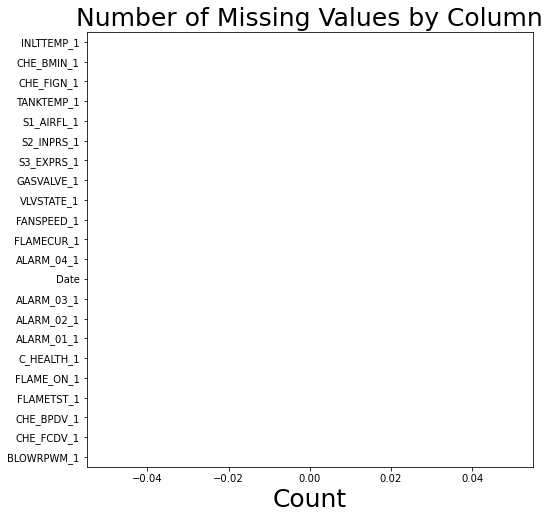

In [143]:
# bar chart to see missing visual in df_data
plt.figure(figsize = (8,8))

df_final.isnull().sum().plot(kind = 'barh')
plt.title('Number of Missing Values by Column', size = 25)
plt.xlabel('Count', size = 25);

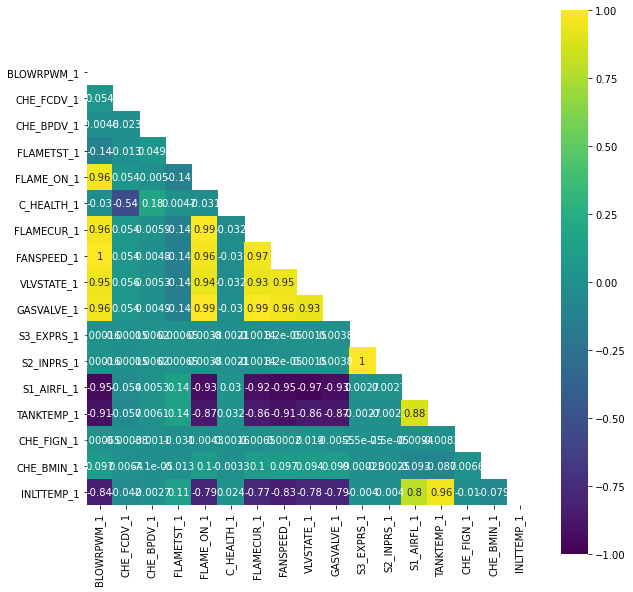

In [144]:
#visual of correlation between fields or columns
plt.figure(figsize=(10, 10))
mask = np.zeros_like(df_final.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_final.corr(), mask = mask, square = True, cmap = 'viridis', annot = True, vmin=-1, vmax=1);
#sns.heatmap(df_final.corr(), annot = True, vmin=-1, vmax=1, center= 0);

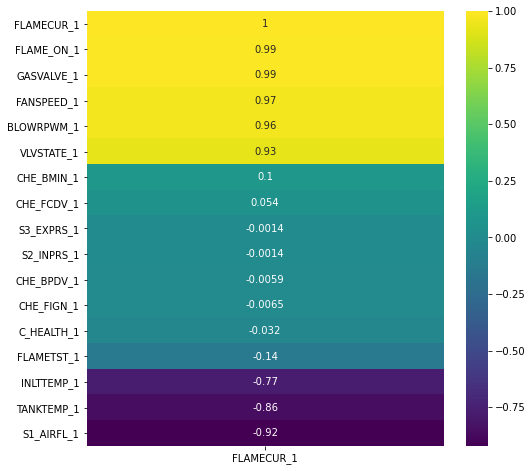

In [145]:
#visual of correlation between fields or columns
plt.figure(figsize=(8,8))

sns.heatmap(df_final.corr()[['FLAMECUR_1']].sort_values('FLAMECUR_1', ascending=False), annot=True, cmap='viridis');

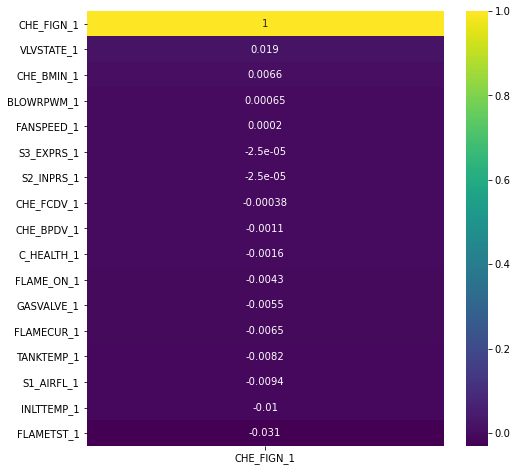

In [146]:
#visual of correlation between fields or columns
plt.figure(figsize=(8,8))

sns.heatmap(df_final.corr()[['CHE_FIGN_1']].sort_values('CHE_FIGN_1', ascending=False), annot=True, cmap='viridis');

In [147]:
#numeric data from df_data
df_numeric = df_final._get_numeric_data()

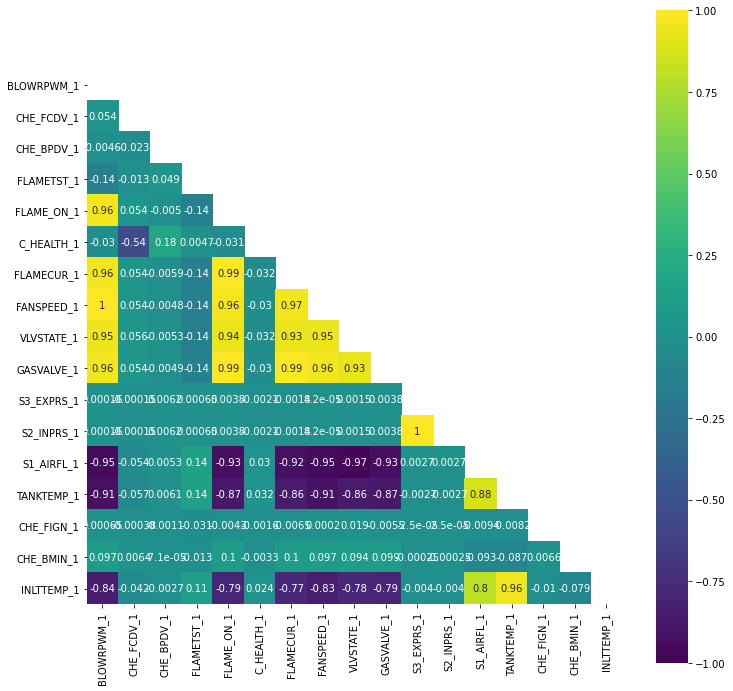

In [148]:
plt.figure(figsize=(12, 12))
mask = np.zeros_like(df_numeric.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_numeric.corr(), mask = mask, square = True, cmap = 'viridis', annot = True, vmin=-1, vmax=1);


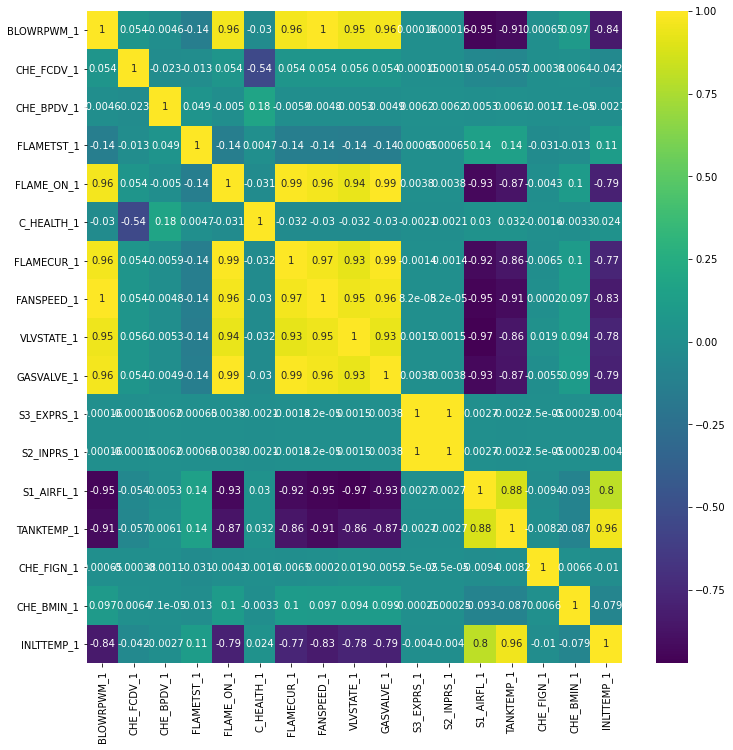

In [149]:
plt.figure(figsize=(12,12))

sns.heatmap(df_numeric.corr(), annot=True, cmap='viridis');

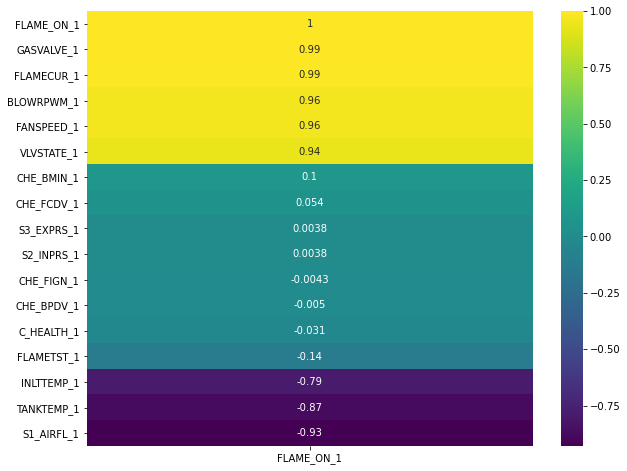

In [150]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df_numeric.corr()[['FLAME_ON_1']].sort_values('FLAME_ON_1', ascending=False), annot=True, cmap='viridis');

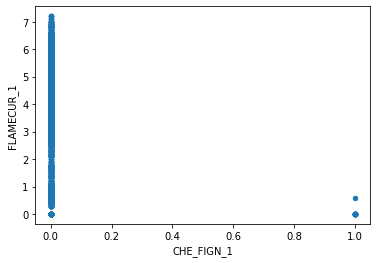

In [151]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
df_final.plot(kind='scatter', x = 'CHE_FIGN_1', y='FLAMECUR_1');

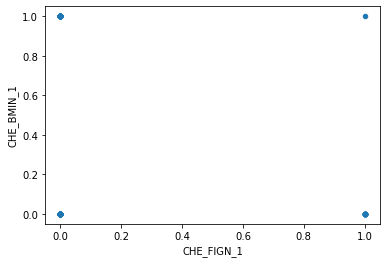

In [152]:
#Scatter plot to see relation between CHE_FIGN and CHE_BMIN
df_final.plot(kind='scatter', x = 'CHE_FIGN_1', y='CHE_BMIN_1');

## Feature selection

In [153]:
df_final.isnull().sum()

BLOWRPWM_1    0
CHE_FCDV_1    0
CHE_BPDV_1    0
FLAMETST_1    0
FLAME_ON_1    0
C_HEALTH_1    0
ALARM_01_1    0
ALARM_02_1    0
ALARM_03_1    0
Date          0
ALARM_04_1    0
FLAMECUR_1    0
FANSPEED_1    0
VLVSTATE_1    0
GASVALVE_1    0
S3_EXPRS_1    0
S2_INPRS_1    0
S1_AIRFL_1    0
TANKTEMP_1    0
CHE_FIGN_1    0
CHE_BMIN_1    0
INLTTEMP_1    0
dtype: int64

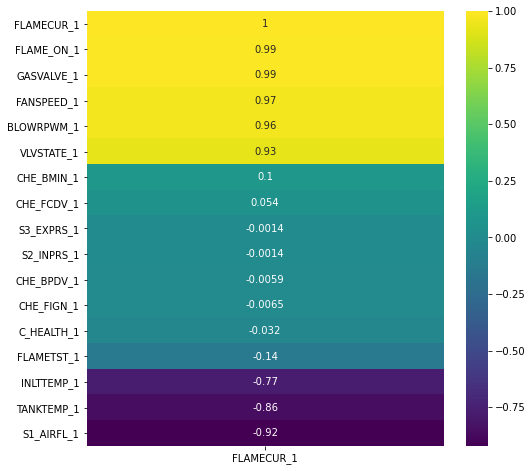

In [154]:
#visual of correlation between fields or columns
plt.figure(figsize=(8,8))

sns.heatmap(df_final.corr()[['FLAMECUR_1']].sort_values('FLAMECUR_1', ascending=False), annot=True, cmap='viridis');

In [155]:
df_final.columns

Index(['BLOWRPWM_1', 'CHE_FCDV_1', 'CHE_BPDV_1', 'FLAMETST_1', 'FLAME_ON_1',
       'C_HEALTH_1', 'ALARM_01_1', 'ALARM_02_1', 'ALARM_03_1', 'Date',
       'ALARM_04_1', 'FLAMECUR_1', 'FANSPEED_1', 'VLVSTATE_1', 'GASVALVE_1',
       'S3_EXPRS_1', 'S2_INPRS_1', 'S1_AIRFL_1', 'TANKTEMP_1', 'CHE_FIGN_1',
       'CHE_BMIN_1', 'INLTTEMP_1'],
      dtype='object')

In [156]:
selected_features = df_final[['FLAMECUR_1', 'FLAME_ON_1', 'GASVALVE_1', 'FANSPEED_1',
                              'BLOWRPWM_1', 'VLVSTATE_1', 'CHE_BMIN_1',
                              
                              'FLAMETST_1', 'INLTTEMP_1', 'TANKTEMP_1', 'S1_AIRFL_1']]

In [157]:
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 208109 entries, 2021-09-10 12:57:57 to 2021-09-15 08:52:17
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   FLAMECUR_1  208109 non-null  float64
 1   FLAME_ON_1  208109 non-null  float64
 2   GASVALVE_1  208109 non-null  int64  
 3   FANSPEED_1  208109 non-null  int32  
 4   BLOWRPWM_1  208109 non-null  float64
 5   VLVSTATE_1  208109 non-null  int64  
 6   CHE_BMIN_1  208109 non-null  float64
 7   FLAMETST_1  208109 non-null  float64
 8   INLTTEMP_1  208109 non-null  float64
 9   TANKTEMP_1  208109 non-null  float64
 10  S1_AIRFL_1  208109 non-null  int64  
dtypes: float64(7), int32(1), int64(3)
memory usage: 18.3 MB


In [158]:
selected_features.isnull().sum()

FLAMECUR_1    0
FLAME_ON_1    0
GASVALVE_1    0
FANSPEED_1    0
BLOWRPWM_1    0
VLVSTATE_1    0
CHE_BMIN_1    0
FLAMETST_1    0
INLTTEMP_1    0
TANKTEMP_1    0
S1_AIRFL_1    0
dtype: int64

C:\Users\muhammad.tahir.ctr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


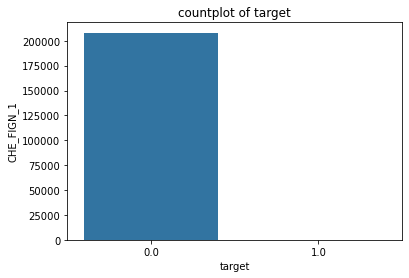

In [159]:
sns.countplot(df_final['CHE_FIGN_1'])

plt.title('countplot of target')
plt.xlabel('target')
plt.ylabel('CHE_FIGN_1')
plt.show()

In [200]:
df_final['CHE_FIGN_1'].value_counts(normalize=True)

0.0    0.999933
1.0    0.000067
Name: CHE_FIGN_1, dtype: float64

In [160]:
y = df_final['CHE_FIGN_1']
X = selected_features

In [161]:
# Import train_test_split.
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [162]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression

# Import metrics.
from sklearn.metrics import (confusion_matrix, plot_confusion_matrix,
    accuracy_score, plot_roc_curve, roc_auc_score, recall_score,
    precision_score, f1_score)

In [163]:
logreg = LogisticRegression(solver='liblinear')#, class_weight={0:1, 1:8})

# Step 3: Fit our model.
# Fit model.
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train),logreg.score(X_test, y_test)

(0.9999295237729128, 0.9999423387406781)

In [164]:
preds = logreg.predict(X_test)

In [165]:
confusion_matrix(y_test, preds)

array([[52025,     0],
       [    3,     0]], dtype=int64)

In [166]:
df_final['CHE_FIGN_1'].value_counts()

0.0    208095
1.0        14
Name: CHE_FIGN_1, dtype: int64

In [167]:
df_final['CHE_FIGN_1'].unique()

array([0., 1.])

In [196]:
52028*4, (208095+14)/4

(208112, 52027.25)

## Logistic Regression; Binary classification

In [168]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [169]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [170]:
# Step 2: Instantiate our model.
logregs = LogisticRegression(solver='liblinear', class_weight={0:1, 1:1000})

# Step 3: Fit our model.
# Fit model.
logregs.fit(X_train_ss, y_train)
logregs.score(X_train_ss, y_train),logreg.score(X_test_ss, y_test)

(0.9978344577495019, 0.570596601829784)

In [171]:
# Get our scores
print('Cross val score:', cross_val_score(logregs, X_train_ss, y_train, cv=5).mean())

Cross val score: 0.9979113418911323


In [172]:
# Step 4 (part 1): Generate predicted values.
preds_lr = logregs.predict(X_test_ss)

In [173]:
y.value_counts(normalize=True)

0.0    0.999933
1.0    0.000067
Name: CHE_FIGN_1, dtype: float64

In [174]:
# Step 5: Evaluate model.
logregs.score(X_train_ss, y_train) # Training Accuracy score

0.9978344577495019

In [175]:
# Step 5: Evaluate model (on testing).
logregs.score(X_test_ss, y_test) # Testing Accuracy score

0.9980971784423772

In [176]:
confusion_matrix(y_test, preds_lr)

array([[51926,    99],
       [    0,     3]], dtype=int64)

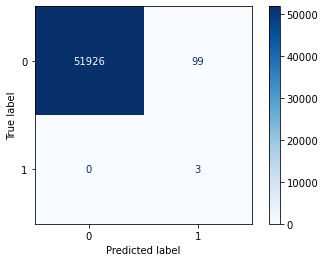

In [177]:
plot_confusion_matrix(logregs, X_test_ss, y_test, cmap='Blues', 
                      values_format='d', display_labels=['0', '1']);

In [188]:
confusion_matrix(y_test,preds_lr)
pd.crosstab(y_test, preds_lr, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0.0,1.0,All
Actual,,,
0.0,51926,99,52025
1.0,0,3,3
All,51926,102,52028


In [178]:
# 0 means no failed and 1 mean1 yes one failed ignition

In [ ]:
# TN     FP

# FN     TP

In [187]:
# Accuracy, how often is the classifier correct?
#TP+TN)/total
(51926+3)/(51926+102)

0.9980971784423772

In [189]:
# misclassification rate, how often is it wrong ?
# also known as error rate
# (FP+FN)total  # equal to accuracy-1
(99+0)/(51926+102)

0.0019028215576228184

In [190]:
# True positive Rate
# also known as sensitivity or recall
# when yes==1 is actually ignition failed then predict yes
# TP/actual yes == TP/(FN+TP)
3/(3+0)

1.0

In [191]:
# False positive rate, when it's actually no how often it predict yes
#  FP/actual no == FP/(TN+FP)
#  
99/(51926+99)

0.0019029312830370015

In [192]:
# True Negative Rate, specificity
# 1 minus false positive rate
# TN/(TN+FP)
51926/(51926+99)

0.998097068716963

In [193]:
# when predict yes, how often is it correct ?
# TP/(FP+TP)
3/(99+3)

0.029411764705882353

In [197]:
# prevalence, how often does the yes condition actually occur in our sample
# actual yes / total == (FN+TP)/(total)
(0+3)/(51926+102)

5.766125932190359e-05

In [179]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds_lr))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52025
         1.0       0.03      1.00      0.06         3

    accuracy                           1.00     52028
   macro avg       0.51      1.00      0.53     52028
weighted avg       1.00      1.00      1.00     52028



## Discussion of Results

In [180]:
# Class imbalance means 0 and 1, so we can use class weight

In [181]:
# which one we need TP, TN, FP or FN, then we can tune accordingly

In [182]:
# we can do parameter tuning accordingly

In [183]:
# is this what we need or we need time series prediction

In [184]:
# data is very good in sense of time sequence

In [185]:
# we can include alarm one and any other variable if important

In [186]:
# In between 10 to 13 , 9 failed happen and we have no data